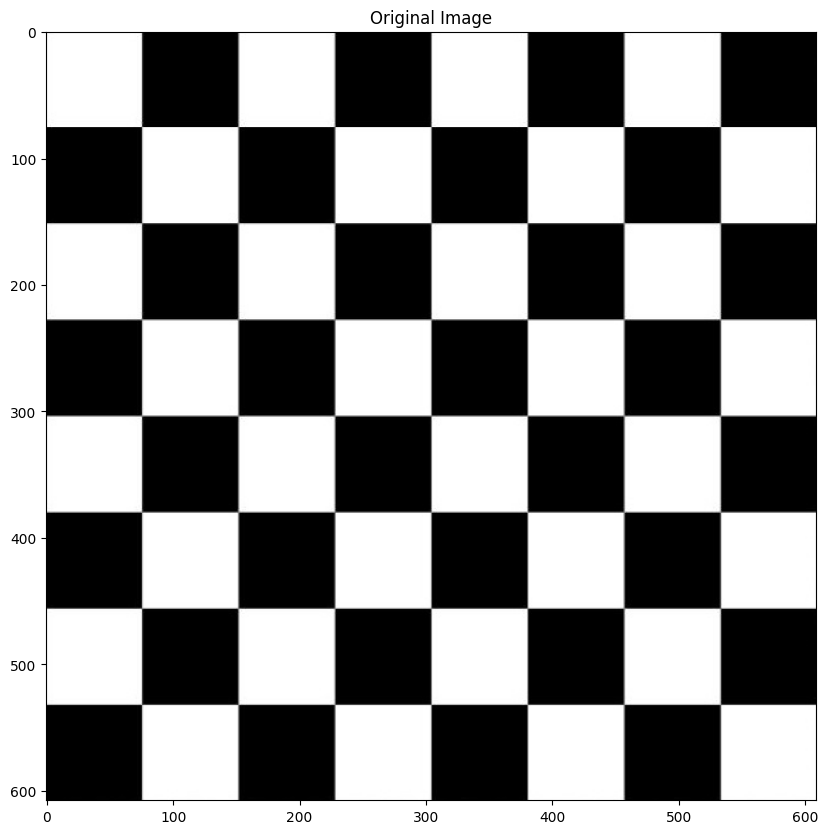

In [19]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
def imshow(title = "Image" , image = None , size = 10):
    w , h = image.shape[0] , image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size , size * aspect_ratio))
    plt.imshow(cv2.cvtColor(image , cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

image = cv2.imread("images/chess.jpg" )
imshow("Original Image" , image)


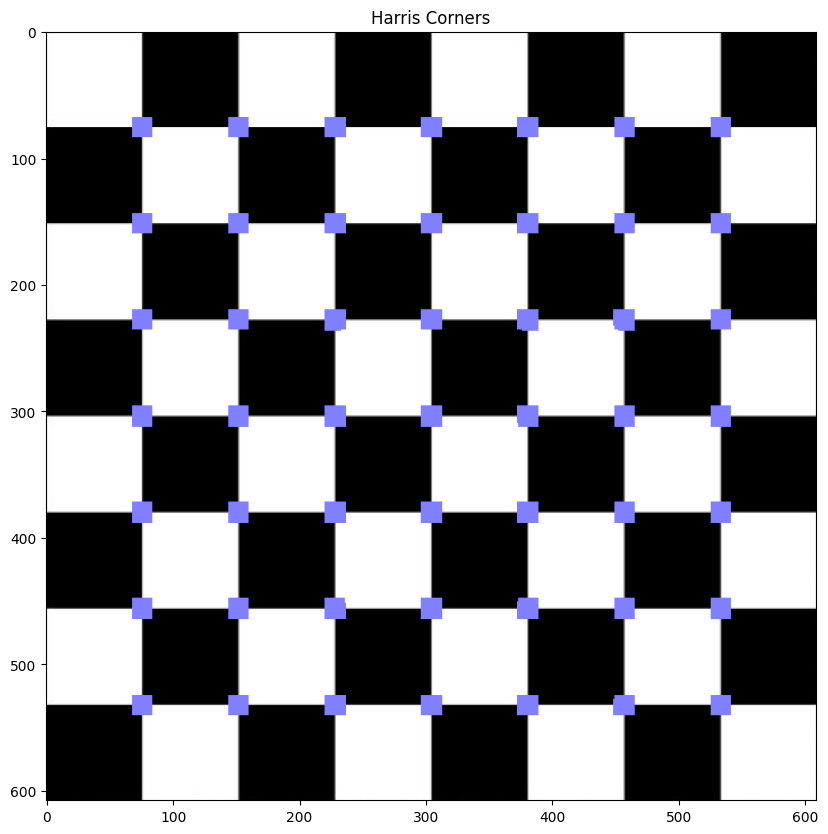

In [20]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)

harris_corners = cv2.cornerHarris(gray, 3, 3, 0.05)

kernel = np.ones((7,7),np.uint8)
harris_corners = cv2.dilate(harris_corners, kernel, iterations = 2)

image[harris_corners > 0.025 * harris_corners.max() ] = [255, 127, 127]

imshow('Harris Corners', image)

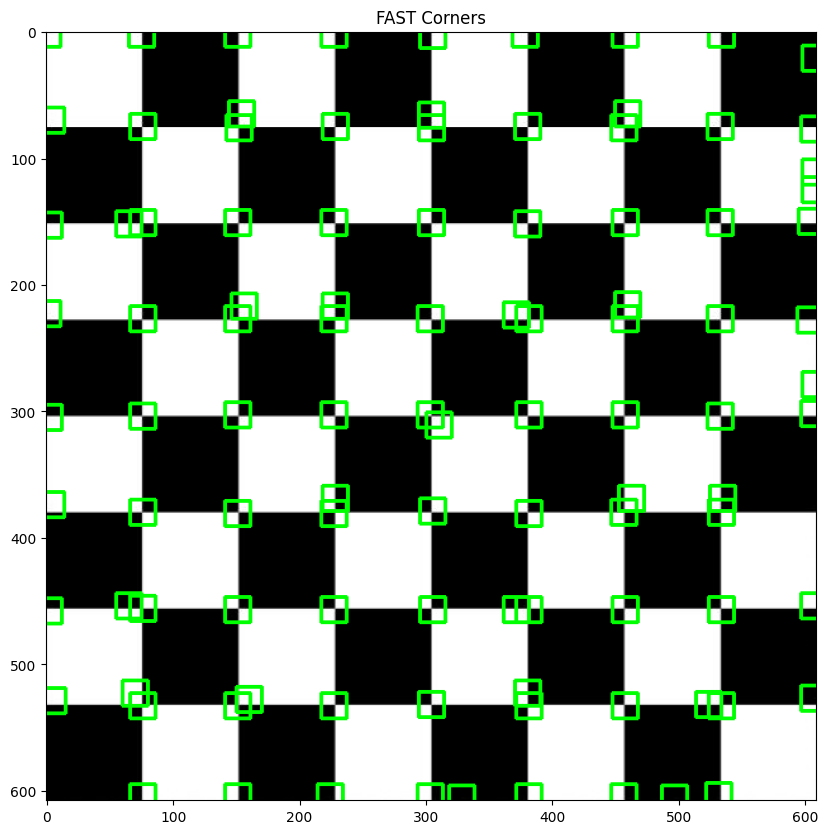

In [21]:
img = cv2.imread('images/chess.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fast = cv2.goodFeaturesToTrack(gray, 200, 0.00005, 10)

for corner in fast:
    x, y = corner[0]
    x = int(x)
    y = int(y)
    cv2.rectangle(img, (x-10, y-10), (x+10, y+10), (0, 255, 0), 2)

imshow('FAST Corners', img)
